In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score



In [3]:
# Loading and preprocessing Data

In [4]:
# Loading data
file_path = Path("../apestogetherstrong/logistic_regression_test.csv")
df_equities = pd.read_csv(file_path)
df_equities.head()

,data_index,symbol,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,8/20/2020,318382,1651518,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,8/20/2020,1543881,5460701,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,8/20/2020,151621,584100,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,8/20/2020,10963,36708,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,8/20/2020,177,1191,0,0,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [5]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 42 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   date                                          623468 non-null  object 
 3   volume                                        623468 non-null  int64  
 4   volume_previousday                            623468 non-null  int64  
 5   volume_greater_previousday                    623468 non-null  int64  
 6   volume_deathIncrease_up                       623468 non-null  int64  
 7   volume_hospitalizedIncrease_up                623468 non-null  int64  
 8   volume_negativeIncrease_up                    623468 non-null  int64  
 9   volume_positiveIncrease_up                    62

In [6]:
rf_df = pd.DataFrame().assign(symbol=df_equities['symbol'],date=df_equities['date'],high=df_equities['high'],iexClose=df_equities['iexClose'],deathIncrease=df_equities['deathIncrease'],negativeIncrease=df_equities['negativeIncrease'],positiveIncrease=df_equities['positiveIncrease'],totalTestResultsIncrease=df_equities['totalTestResultsIncrease'],iexClose_deathIncrease_up=df_equities['iexClose_deathIncrease_up'])
print(rf_df)

       symbol        date    high  iexClose  deathIncrease  negativeIncrease  \
0           A   8/20/2020  98.150    98.065           1129            208472   
1          AA   8/20/2020  15.120    14.965           1129            208472   
2        AAAU   8/20/2020  19.440    19.400           1129            208472   
3        AACG   8/20/2020   1.126     1.190           1129            208472   
4        AADR   8/20/2020  56.330    58.260           1129            208472   
...       ...         ...     ...       ...            ...               ...   
623463    ZVO  12/23/2020   4.270     4.130           3393            304962   
623464   ZYME  12/23/2020  53.700    51.030           3393            304962   
623465   ZYNE  12/23/2020   3.505     3.415           3393            304962   
623466   ZYXI  12/23/2020  14.490    13.820           3393            304962   
623467   TRUE  12/23/2020   4.610     4.505           3393            304962   

        positiveIncrease  totalTestResu

In [7]:
float or np.ndarray(dtype=float)
rf_df['date'] = pd.to_datetime(rf_df['date'])    
rf_df['date_delta'] = (rf_df['date'] - rf_df['date'].min())  / np.timedelta64(1,'D')
# converting to object
rf_df = rf_df.astype({"date":'int64'}) 

In [8]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   symbol                     623468 non-null  object 
 1   date                       623468 non-null  int64  
 2   high                       623468 non-null  float64
 3   iexClose                   623468 non-null  float64
 4   deathIncrease              623468 non-null  int64  
 5   negativeIncrease           623468 non-null  int64  
 6   positiveIncrease           623468 non-null  int64  
 7   totalTestResultsIncrease   623468 non-null  int64  
 8   iexClose_deathIncrease_up  623468 non-null  int64  
 9   date_delta                 623468 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 47.6+ MB


In [9]:
rf_df = rf_df.drop(labels=["symbol", "date"], axis=1)
rf_df.head()



,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_deathIncrease_up,date_delta
0,98.150,98.065,1129,208472,43844,864210,0,0.0
1,15.120,14.965,1129,208472,43844,864210,0,0.0
2,19.440,19.400,1129,208472,43844,864210,0,0.0
3,1.126,1.190,1129,208472,43844,864210,0,0.0
4,56.330,58.260,1129,208472,43844,864210,0,0.0


In [10]:
rf_df.tail()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,iexClose_deathIncrease_up,date_delta
623463,4.270,4.130,3393,304962,224526,1791481,1,125.0
623464,53.700,51.030,3393,304962,224526,1791481,0,125.0
623465,3.505,3.415,3393,304962,224526,1791481,0,125.0
623466,14.490,13.820,3393,304962,224526,1791481,0,125.0
623467,4.610,4.505,3393,304962,224526,1791481,1,125.0


In [11]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   high                       623468 non-null  float64
 1   iexClose                   623468 non-null  float64
 2   deathIncrease              623468 non-null  int64  
 3   negativeIncrease           623468 non-null  int64  
 4   positiveIncrease           623468 non-null  int64  
 5   totalTestResultsIncrease   623468 non-null  int64  
 6   iexClose_deathIncrease_up  623468 non-null  int64  
 7   date_delta                 623468 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 38.1 MB


In [12]:
# Create our features
#X = pd.get_dummies(df_equities, columns=["death", "deathIncrease", "hospitalizedIncrease", "hospitalizedCurrently", "negative", "positive", "totalTestResults", "totalTestResultsIncrease"])
X = rf_df.drop('iexClose_deathIncrease_up',axis=1)
# Create our target
y = pd.DataFrame(rf_df["iexClose_deathIncrease_up"])
X.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
0,98.150,98.065,1129,208472,43844,864210,0.0
1,15.120,14.965,1129,208472,43844,864210,0.0
2,19.440,19.400,1129,208472,43844,864210,0.0
3,1.126,1.190,1129,208472,43844,864210,0.0
4,56.330,58.260,1129,208472,43844,864210,0.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   high                      623468 non-null  float64
 1   iexClose                  623468 non-null  float64
 2   deathIncrease             623468 non-null  int64  
 3   negativeIncrease          623468 non-null  int64  
 4   positiveIncrease          623468 non-null  int64  
 5   totalTestResultsIncrease  623468 non-null  int64  
 6   date_delta                623468 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 33.3 MB


In [14]:
X.describe()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
count,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,6.234680e+05,623468.000000
mean,41.163351,42.778524,1273.873418,250270.392405,100151.316456,1.282244e+06,62.164557
std,103.949506,104.890778,806.655191,124994.255672,68173.329913,4.011269e+05,35.269849
min,0.000000,0.007000,246.000000,-658774.000000,22310.000000,5.468590e+05,0.000000
25%,7.580000,9.180000,847.000000,211097.000000,43642.000000,9.504830e+05,33.000000
50%,21.680000,22.920000,1047.000000,263255.000000,63430.000000,1.182695e+06,61.000000
75%,42.739250,44.160000,1358.000000,304962.000000,166503.000000,1.653269e+06,91.000000
max,4530.000000,4474.000000,3453.000000,456078.000000,236933.000000,2.010951e+06,125.000000


In [15]:
# Check the balance of our target values
y['iexClose_deathIncrease_up'].value_counts()

0    480449
1    143019
Name: iexClose_deathIncrease_up, dtype: int64

In [16]:
y.head()

,iexClose_deathIncrease_up
0,0
1,0
2,0
3,0
4,0


In [17]:
# Check the balance of our target values
y['iexClose_deathIncrease_up'].value_counts(normalize=True)

0    0.770607
1    0.229393
Name: iexClose_deathIncrease_up, dtype: float64

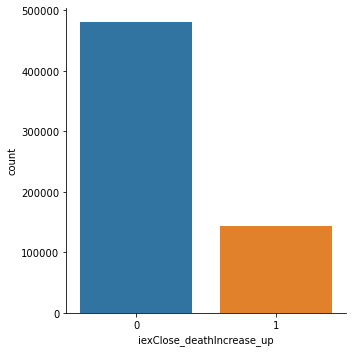

In [18]:
import seaborn as sn
sn.factorplot('iexClose_deathIncrease_up', data=y,kind='count')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [22]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'iexClose_deathIncrease_up': 1})

In [25]:
# Train the Logistic Regression model using the resampled data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)

# Fit
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=10)

In [27]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7042104583198225

In [28]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[101233,  18879],
       [ 15532,  20223]], dtype=int64)

In [29]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.84      0.57      0.85      0.69      0.49    120112
          1       0.52      0.57      0.84      0.54      0.69      0.46     35755

avg / total       0.79      0.78      0.63      0.78      0.69      0.48    155867



### SMOTE Oversampling

In [30]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
# Resample the targets
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'iexClose_deathIncrease_up': 1})

In [31]:
# Train the Logistic Regression model using the resampled data
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(n_estimators=10)

In [33]:
# Calculated the balanced accuracy score
y_pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7277643835035652

In [34]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)


array([[97680, 22432],
       [12790, 22965]], dtype=int64)

In [35]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.81      0.64      0.85      0.72      0.53    120112
          1       0.51      0.64      0.81      0.57      0.72      0.51     35755

avg / total       0.80      0.77      0.68      0.78      0.72      0.53    155867



# Undersampling

In this section, you will test an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [36]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

KeyboardInterrupt: 

In [ ]:
# Train the Random Forest model using the resampled data
rf_model.fit(X_resampled, y_resampled)


In [ ]:
# Calculated the balanced accuracy score
y_pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
logreg_model.fit(X_resampled, y_resampled)

In [ ]:
# Calculated the balanced accuracy score
y_pred = logreg_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))